# HW05_YUANJUN GE

## Q2.3

In [34]:
import numpy as np
from numpy.linalg import svd
import pandas as pd
import matplotlib.pyplot as plt

In [29]:
def reconstruction_error(data,reconstruction):
    return np.sum((data- reconstruction)**2)/len(data)


def buggy_pca(data,d):
    U,S,VT = svd(data,full_matrices=False)
    Z = np.dot(data, VT[:d].T)
    reconstruction = np.dot(Z,VT[:d])
    re_error = reconstruction_error(data,reconstruction)
    return Z, VT, reconstruction, re_error

def demeaned_pca(data,d):
    mean = np.mean(data,axis=0)
    Z,VT,reconstruction,_ = buggy_pca((data-mean),d)
    reconstruction += mean
    re_error = reconstruction_error(data,reconstruction)
    return Z, (VT,mean), reconstruction,re_error

def normalized_pca(data,d):
    mean = np.mean(data,axis=0)
    std = np.std(data,axis=0)
    Z,VT,reconstruction, _ = buggy_pca((data-mean)/std,d)
    reconstruction =reconstruction*std + mean
    re_error = reconstruction_error(data,reconstruction)
    return Z, (VT,mean,std), reconstruction,re_error

def dro(data,d):
    mean = np.mean(data,axis=0)
    U,S,VT = svd((data-mean), full_matrices=False)
    n = len(data)
    Z = np.sqrt(n) * U[:,:d]
    A = np.dot((np.sqrt(1/n) * np.diag(S[:d])), VT[:d]).T
    reconstruction = np.dot(Z, A.T) + mean
    b = mean
    re_error = reconstruction_error(data,reconstruction)
    return Z,(A,b),reconstruction,re_error


In [28]:
data2D = pd.read_csv('./data/data2D.csv',header=None).values
data1000D = pd.read_csv('./data/data1000D.csv',header=None).values

Reconstruction error for 2D dataset (buggy PCA): 0.8869030837347942
Reconstruction error for 2D dataset (demeaned PCA): 0.010006085628512911
Reconstruction error for 2D dataset (normalized PCA): 0.04947208345477067
Reconstruction error for 2D dataset (DRO): 0.010006085628512929


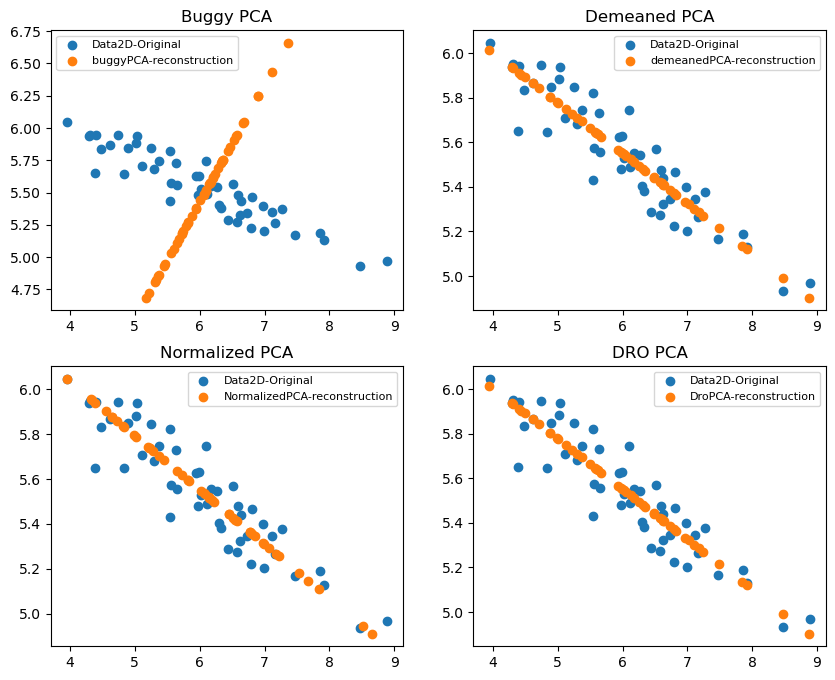

In [45]:
# FOR 2D
_,_,buggy_recon,buggy_err = buggy_pca(data2D,1)
_,_,demeaned_recon,demeaned_err = demeaned_pca(data2D,1)
_,_,nomal_recon,nomal_err = normalized_pca(data2D,1)
_,_,dro_recon,dro_err = dro(data2D,1)

print(f"Reconstruction error for 2D dataset (buggy PCA): {buggy_err}")
print(f"Reconstruction error for 2D dataset (demeaned PCA): {demeaned_err}")
print(f"Reconstruction error for 2D dataset (normalized PCA): {nomal_err}")
print(f"Reconstruction error for 2D dataset (DRO): {dro_err}")

plt.figure(figsize=(10,8))
plt.subplot(2,2,1)
plt.scatter(data2D[:,0],data2D[:,1],label = 'Data2D-Original')
plt.scatter(buggy_recon[:,0],buggy_recon[:,1],label = 'buggyPCA-reconstruction')
plt.legend(fontsize=8)
plt.title('Buggy PCA')
plt.subplot(2,2,2)
plt.scatter(data2D[:,0],data2D[:,1],label = 'Data2D-Original')
plt.scatter(demeaned_recon[:,0],demeaned_recon[:,1],label = 'demeanedPCA-reconstruction')
plt.legend(fontsize=8)
plt.title('Demeaned PCA')
plt.subplot(2,2,3)
plt.scatter(data2D[:,0],data2D[:,1],label = 'Data2D-Original')
plt.scatter(nomal_recon[:,0],nomal_recon[:,1],label = 'NormalizedPCA-reconstruction')
plt.legend(fontsize=8)
plt.title('Normalized PCA')
plt.subplot(2,2,4)
plt.scatter(data2D[:,0],data2D[:,1],label = 'Data2D-Original')
plt.scatter(dro_recon[:,0],dro_recon[:,1],label = 'DroPCA-reconstruction')
plt.legend(fontsize=8)
plt.title('DRO PCA')
plt.show()


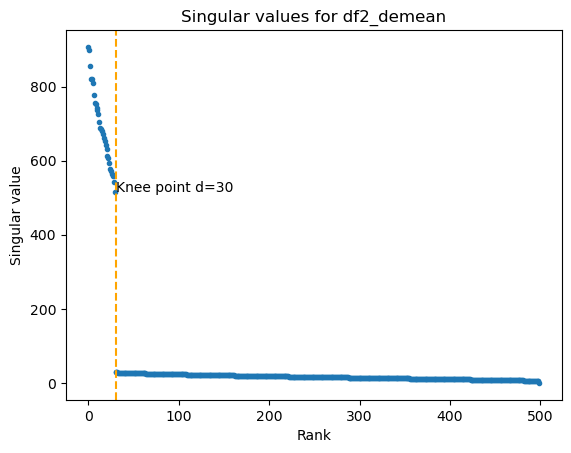

In [55]:
# FOR 1000D
_,S,_ = svd((data1000D-np.mean(data1000D,axis=0)),full_matrices=False)
plt.figure()
plt.plot(S,'.')
plt.xlabel('Rank')
plt.ylabel('Singular value')
plt.title('Singular values for df2_demean')
plt.axvline(x=30,linestyle='--',color='orange')
plt.annotate('Knee point d=30',xy=(30,S[29]))
plt.show()

In [56]:
_,_,buggy_recon,buggy_err = buggy_pca(data1000D,30)
_,_,demeaned_recon,demeaned_err = demeaned_pca(data1000D,30)
_,_,nomal_recon,nomal_err = normalized_pca(data1000D,30)
_,_,dro_recon,dro_err = dro(data1000D,30)

print(f"Reconstruction error for 1000D dataset (buggy PCA): {buggy_err}")
print(f"Reconstruction error for 1000D dataset (demeaned PCA): {demeaned_err}")
print(f"Reconstruction error for 1000D dataset (normalized PCA): {nomal_err}")
print(f"Reconstruction error for 1000D dataset (DRO): {dro_err}")

Reconstruction error for 1000D dataset (buggy PCA): 802.7313986203587
Reconstruction error for 1000D dataset (demeaned PCA): 273.04595897860275
Reconstruction error for 1000D dataset (normalized PCA): 273.62858099762326
Reconstruction error for 1000D dataset (DRO): 273.04595897860275
